You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the true position is $\mu = 1$ (in suitable units) and the erorrs are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the likelihoods separately.  Also plot their product. Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (checkout `np.argsort`) 
- Compare it with the MLE estimator derived above

In [22]:
import numpy as np
import astroML as astro
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['font.size'] = 20

In [23]:
"""
N = 1000
mu = 1
sigma = 0.2

# one_gauss = stats.norm(mu,sigma).rvs(1000)
# val, bins, patches = plt.hist(one_gauss, bins=50)

# generate fake measurements
#M = 1
#x = np.linspace(mu-mu, mu+mu, 100)
#plt.plot(x, stats.norm(mu,sigma).pdf(x))
#plt.title('1 measurement')
#plt.show()

fig, axs = plt.subplots(1,3)
fig.tight_layout()
ax = axs.ravel()

M = 500
MIS = np.empty(M,dtype=object)
for m in range(M):
    x_i = np.random.normal(1,0.2)
    sigma_i = np.random.normal(0.2,0.05)
    #sigma_i = 0.2
    p_i = np.log(stats.norm(x_i,sigma_i).pdf(x))
    MIS[m] = p_i
    x = np.linspace(1-x_i,1+x_i,len(p_i))
    ax[1].plot(x, p_i, ls='-.')

ax[0].plot(x, p_i, ls='-.')
ax[0].set_title('One Measurement')
ax[1].set_title(str(M)+' Measurements')  

L = np.sum(MIS)
ax[2].plot(x,L, c='royalblue')
ax[2].set_title('log(L)')
ax[2].axvline(np.mean(x), label=r'$\hat{\mu}$', c='blue')
ax[2].axvline(x[np.argmax(L)], label=r'$\theta$', c='firebrick', ls='-.')
ax[2].legend()
#ax[2].set_xlim([np.mean(x)-0.3*np.mean(x),np.mean(x)+0.3*np.mean(x)])
"""

"\nN = 1000\nmu = 1\nsigma = 0.2\n\n# one_gauss = stats.norm(mu,sigma).rvs(1000)\n# val, bins, patches = plt.hist(one_gauss, bins=50)\n\n# generate fake measurements\n#M = 1\n#x = np.linspace(mu-mu, mu+mu, 100)\n#plt.plot(x, stats.norm(mu,sigma).pdf(x))\n#plt.title('1 measurement')\n#plt.show()\n\nfig, axs = plt.subplots(1,3)\nfig.tight_layout()\nax = axs.ravel()\n\nM = 500\nMIS = np.empty(M,dtype=object)\nfor m in range(M):\n    x_i = np.random.normal(1,0.2)\n    sigma_i = np.random.normal(0.2,0.05)\n    #sigma_i = 0.2\n    p_i = np.log(stats.norm(x_i,sigma_i).pdf(x))\n    MIS[m] = p_i\n    x = np.linspace(1-x_i,1+x_i,len(p_i))\n    ax[1].plot(x, p_i, ls='-.')\n\nax[0].plot(x, p_i, ls='-.')\nax[0].set_title('One Measurement')\nax[1].set_title(str(M)+' Measurements')  \n\nL = np.sum(MIS)\nax[2].plot(x,L, c='royalblue')\nax[2].set_title('log(L)')\nax[2].axvline(np.mean(x), label=r'$\\hat{\\mu}$', c='blue')\nax[2].axvline(x[np.argmax(L)], label=r'$\theta$', c='firebrick', ls='-.')\nax[2]

Text(0.5, 1.0, 'log(L)')

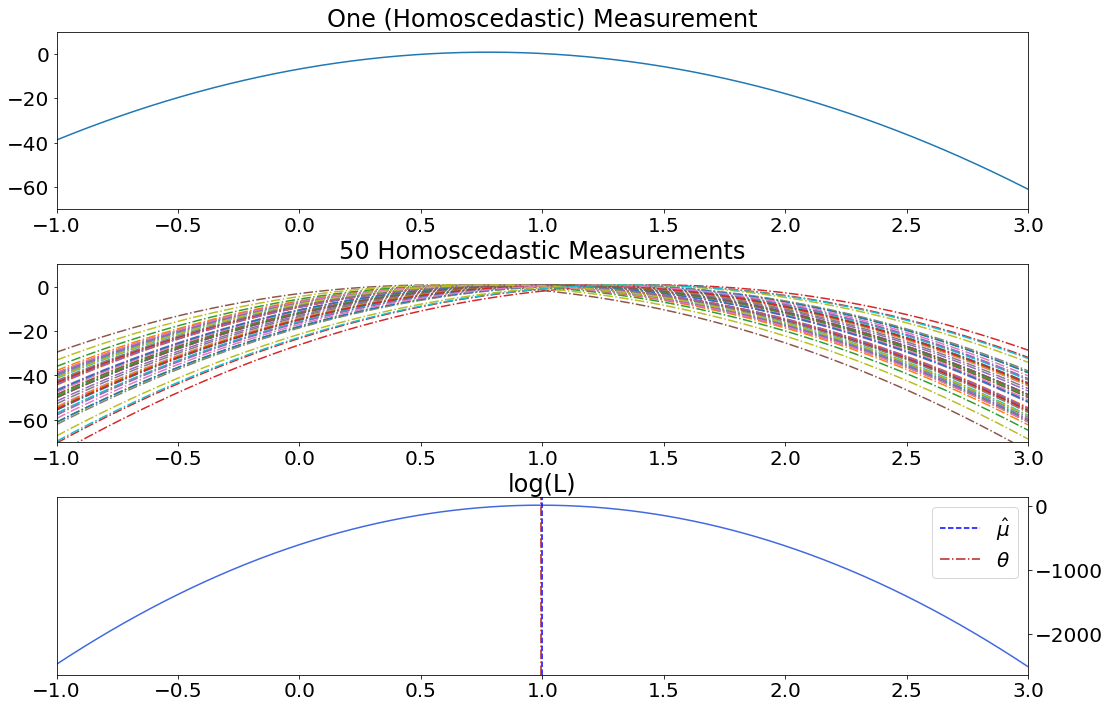

In [39]:
import numpy as np
import astroML as astro
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['font.size'] = 20

N = 5
mu = 1
sigma = 0.2

M = 50
MIS = np.array([None for i in range(M)])

x = np.linspace(-1,3,1000)
fig, axs = plt.subplots(3,1)
for ax in axs: ax.set_xlim(np.min(x),np.max(x))
ax = axs.ravel()

for m in range(M):
    x_i = np.random.normal(1,0.2)
    sigma_i = 0.2
    p_i = np.log(stats.norm(x_i,sigma_i).pdf(x))
    MIS[m] = p_i
    ax[1].plot(x,p_i,ls='-.')

fig.tight_layout()
    
ax[0].plot(x,MIS[np.random.randint(0,len(MIS))])

ax[0].set_ylim([-70,10])
ax[1].set_ylim([-70,10])

L = np.sum(MIS)
ax[2].plot(x,L, c='royalblue')
ax[2].set_title('log(L)')
ax[2].axvline(np.mean(x), label=r'$\hat{\mu}$', c='blue', ls='--')
ax[2].axvline(x[np.argmax(L)], label=r'$\theta$', c='firebrick', ls='-.')
ax[2].legend()
ax[2].yaxis.tick_right()
ax[0].set_title('One (Homoscedastic) Measurement')
ax[1].set_title(str(M)+' Homoscedastic Measurements')  
ax[2].set_title('log(L)')

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution for the three data points above. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

In [42]:
sigma_mu  = np.diff(L,2)
sigma_mu /= (np.diff(x)[0])**2
sigma_mu *= -1
sigma_mu  = 1/np.sqrt(sigma_mu)[0]
print(r'$\sigma_{\mu}$ by hand = ', np.around(sigma_mu,5))
print(r'$\sigma_{\mu}$ by theory = ', np.around(sigma/np.sqrt(M),5))

iMLE = np.argmax(L)
MLE = x[iMLE]

sMLE  = np.diff(L,2)
sMLE /= (np.diff(x)[iMLE])**2
sMLE *= -1
sMLE  = 1/np.sqrt(sMLE[iMLE])
print('Rifatto 20/03/2022')

print(r'$\sigma_{\mu}$ by hand = ', np.around(sMLE,5))
print(r'$\sigma_{\mu}$ by theory = ', np.around(sigma/np.sqrt(M),5))

$\sigma_{\mu}$ by hand =  0.02828
$\sigma_{\mu}$ by theory =  0.02828
Rifatto 20/03/2022
$\sigma_{\mu}$ by hand =  0.02828
$\sigma_{\mu}$ by theory =  0.02828


### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

Text(0.5, 1.0, 'log(L)')

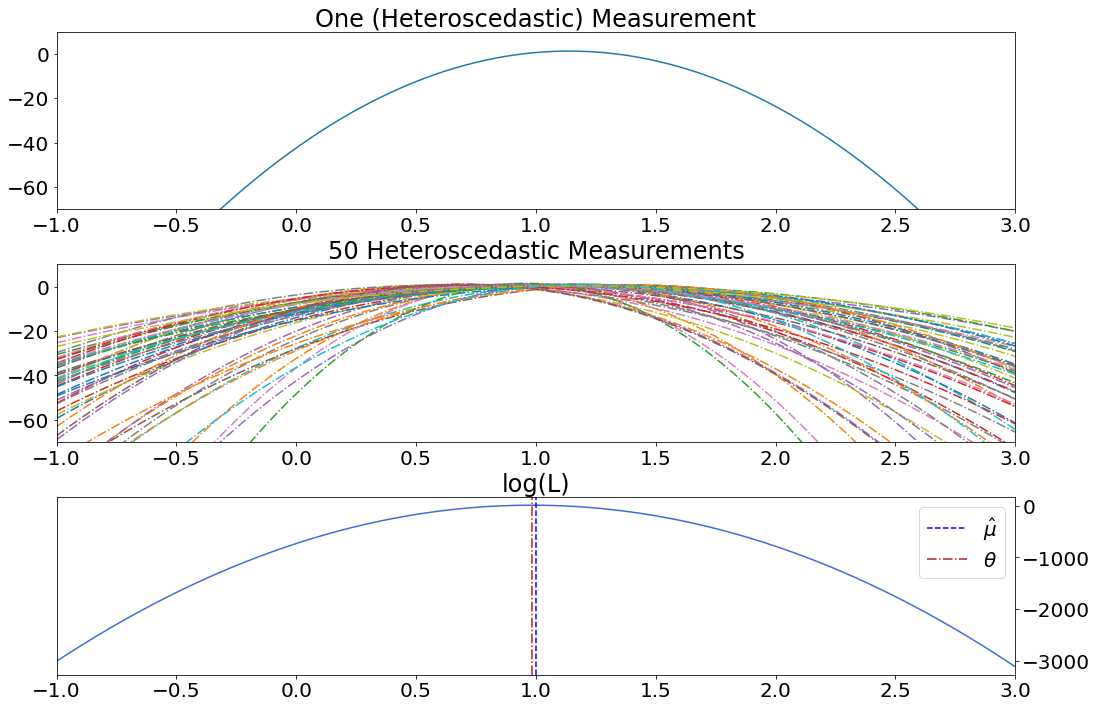

In [44]:
import numpy as np
import astroML as astro
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['font.size'] = 20

N = 5
mu = 1
sigma = 0.2

M = 50
MIS = np.array([None for i in range(M)])

x = np.linspace(-1,3,1000)
fig, axs = plt.subplots(3,1)
for ax in axs: ax.set_xlim(np.min(x),np.max(x))
ax = axs.ravel()

for m in range(M):
    x_i = np.random.normal(1,0.2)
    sigma_i = np.random.normal(0.2,0.05)
    p_i = np.log(stats.norm(x_i,sigma_i).pdf(x))
    MIS[m] = p_i
    ax[1].plot(x,p_i,ls='-.')

fig.tight_layout()
    
ax[0].plot(x,MIS[np.random.randint(0,len(MIS))])

ax[0].set_ylim([-70,10])
ax[1].set_ylim([-70,10])

L = np.sum(MIS)
ax[2].plot(x,L, c='royalblue')
ax[2].set_title('log(L)')
ax[2].axvline(np.mean(x), label=r'$\hat{\mu}$', c='blue', ls='--')
ax[2].axvline(x[np.argmax(L)], label=r'$\theta$', c='firebrick', ls='-.')
ax[2].legend()
ax[2].yaxis.tick_right()

ax[0].set_title('One (Heteroscedastic) Measurement')
ax[1].set_title(str(M)+' Heteroscedastic Measurements')  
ax[2].set_title('log(L)')

In [51]:
sigma_mu  = np.diff(L,2)
sigma_mu /= (np.diff(x)[0])**2
sigma_mu *= -1
sigma_mu  = 1/np.sqrt(sigma_mu)[0]

print(r'$\sigma_{\mu}$ by hand = ', np.around(sigma_mu,4))
print(r'$\sigma_{\mu}$ by theory = ', np.around(sigma/np.sqrt(M),4))

iMLE = np.argmax(L)
MLE = x[iMLE]

sMLE  = np.diff(L,2)
sMLE /= (np.diff(x)[iMLE])**2
sMLE *= -1
sMLE  = 1/np.sqrt(sMLE[iMLE])
print('Rifatto 20/03/2022')

print(r'$\sigma_{\mu}$ by hand = ', np.around(sMLE,4))
print(r'$\sigma_{\mu}$ by theory = ', np.around(sigma/np.sqrt(M),4))

$\sigma_{\mu}$ by hand =  0.0255
$\sigma_{\mu}$ by theory =  0.0283
Rifatto 20/03/2022
$\sigma_{\mu}$ by hand =  0.0255
$\sigma_{\mu}$ by theory =  0.0283
